In [1]:
# Scientific libraries
              
import numpy as np              
import scipy as sp              
import pandas as pd              
import json              
import missingno as msno              

# Loading Plotting Modules
              
import matplotlib              
import matplotlib.pyplot as plt              
import seaborn as sns              
%matplotlib inline              
import chart_studio.plotly as py              
import plotly.figure_factory as ff              
import plotly.graph_objects as go              
import plotly.express as px              
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot              
init_notebook_mode(connected=True)              

# Setting Data Frame Options
              
pd.set_option('display.max_rows', 40)              
pd.set_option('display.max_columns', 50)              
pd.set_option('display.width', 100)              
pd.set_option('display.max_colwidth', 100)              
          
              
import os

In [2]:
# Setting Plot Configuration
              
sns.set(rc={'figure.figsize':(19,11)}, style = 'white')    

In [3]:
import configparser

wd = os.getcwd()
pardir = os.path.join(wd, os.pardir, )

_CFG_FILE = os.path.join(pardir, os.pardir, 'features.cfg')

cfg = configparser.ConfigParser()
cfg.read(_CFG_FILE)
categoric_trs = json.loads(cfg['categoric']['transaction'])
categoric_id = json.loads(cfg['categoric']['identity'])
categoric_all = categoric_id + categoric_trs

In [54]:
train_cat_trs = pd.read_csv('../../data/train_transaction.csv.zip',
                        usecols=categoric_trs + ['TransactionID'])
train_cat_id = pd.read_csv('../../data/train_identity.csv.zip',
                        usecols=categoric_id + ['TransactionID'])
train_cat_trs.set_index('TransactionID', inplace=True)
train_cat_id.set_index('TransactionID', inplace=True)

In [55]:
test_cat_trs = pd.read_csv('../../data/test_transaction.csv.zip',
                        usecols=categoric_trs + ['TransactionID'])
test_cat_id = pd.read_csv('../../data/test_identity.csv.zip',
                        usecols=categoric_id + ['TransactionID'])
test_cat_trs.set_index('TransactionID', inplace=True)
test_cat_id.set_index('TransactionID', inplace=True)

In [56]:
train_cat_rj = train_cat_trs.join(train_cat_id, how='right')
train_cat_lj = train_cat_trs.join(train_cat_id, how='left')
test_cat_lj = test_cat_trs.join(test_cat_id, how='left')
print('Train Cat (RJ): %d x %d' % train_cat_rj.shape)
print('Train Cat (LJ): %d x %d' % train_cat_lj.shape)
print('Test Cat (LJ): %d x %d' % test_cat_lj.shape)

In [58]:
# Merge Train_lj + Test_lj
all_cat_data = train_cat_lj.append(test_cat_lj)
all_cat_data.head()

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com,NaN,T,T,T,M0,F,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


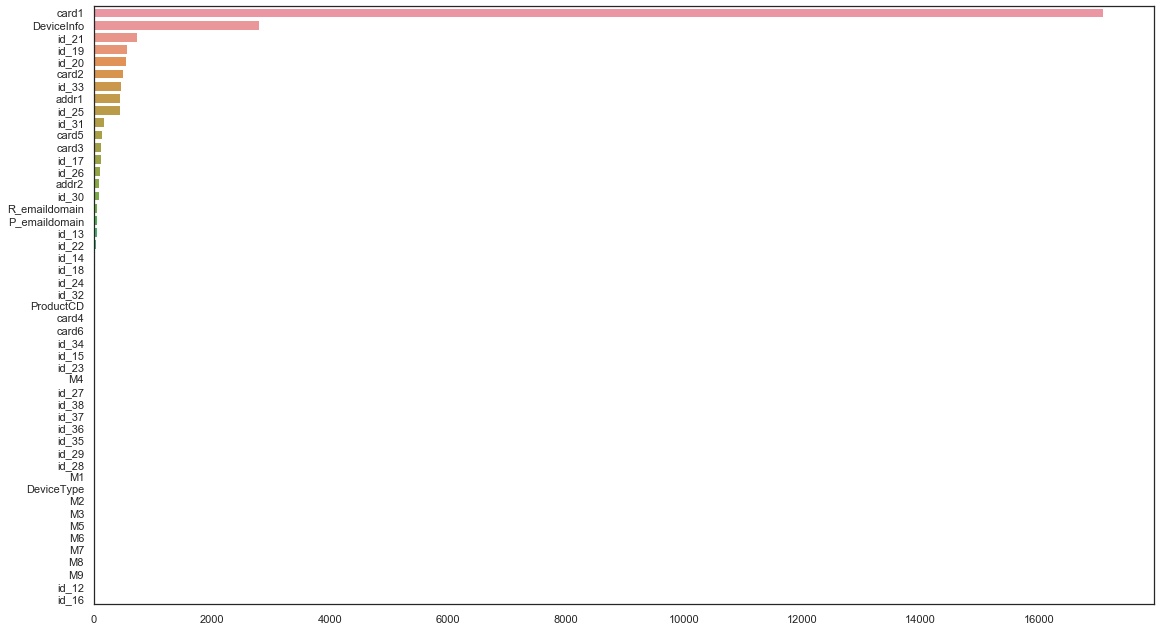

In [59]:
all_cat_class_counts = all_cat_data.nunique().sort_values(ascending=False)
sns.barplot(x = all_cat_class_counts.values,
              y = all_cat_class_counts.index)
None

In [60]:
# We will discard `card1` feature as it has too many unique classes
all_cat_data.drop('card1', axis=1, inplace=True)

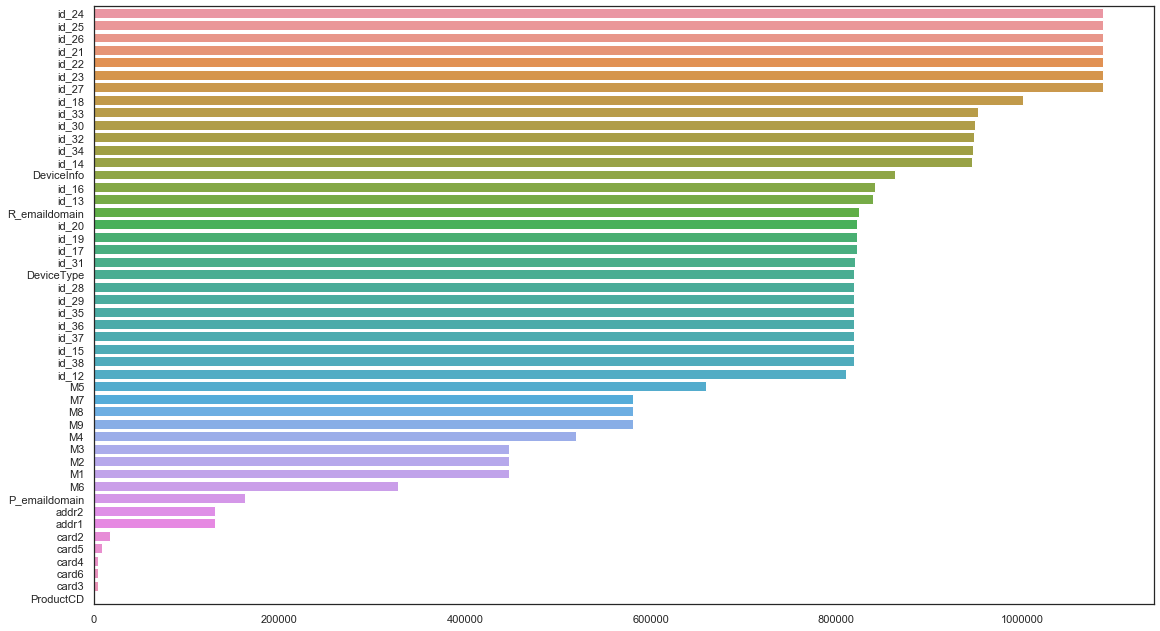

In [61]:
all_cat_missing_count = all_cat_data.isna().sum().sort_values(ascending=False)
sns.barplot(x = all_cat_missing_count.values,
              y = all_cat_missing_count.index)
None

In [42]:
# Filling null values
# all_cat_data.fillna('Other', inplace=True)

In [63]:
train_set_id = train_cat_rj.index.tolist()
dev_set_id = list(set(train_cat_lj.index.tolist()) -  set(train_set_id))
test_set_id = test_cat_lj.index.tolist()

In [64]:
import gc
# del all_cat_dummies, all_cat_data
del train_cat_id, train_cat_trs, test_cat_id, test_cat_trs, train_cat_rj, train_cat_lj, test_cat_lj
gc.collect()

22380

In [74]:
all_cat_data = all_cat_data.astype('object')
all_cat_data.dtypes

ProductCD     object
card2         object
card3         object
card4         object
card5         object
               ...  
id_36         object
id_37         object
id_38         object
DeviceType    object
DeviceInfo    object
Length: 48, dtype: object

In [77]:
all_cat_dummies = pd.get_dummies(all_cat_data, dummy_na=True)
print('Data Frame: %d x %d' % all_cat_dummies.shape)
all_cat_dummies.head()

,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,ProductCD_nan,card2_100.0,card2_101.0,card2_102.0,card2_103.0,card2_104.0,card2_105.0,card2_106.0,card2_107.0,card2_108.0,card2_109.0,card2_110.0,card2_111.0,card2_112.0,card2_113.0,card2_114.0,card2_115.0,card2_116.0,card2_117.0,card2_118.0,...,DeviceInfo_rv:60.0,DeviceInfo_rv:60.1.0,DeviceInfo_rv:61.0,DeviceInfo_rv:62.0,DeviceInfo_rv:63.0,DeviceInfo_rv:64.0,DeviceInfo_rv:65.0,DeviceInfo_verykool,DeviceInfo_verykoolS5005,DeviceInfo_verykoolS5019,DeviceInfo_verykoolS5027,DeviceInfo_verykoolS5524,DeviceInfo_verykoolS5525,DeviceInfo_verykoolS5530 Build/LMY47I,DeviceInfo_verykool_s5516,DeviceInfo_verykools4009,DeviceInfo_verykools5004,DeviceInfo_verykools5034,DeviceInfo_verykools5035,DeviceInfo_verykools5036,DeviceInfo_verykools5702,DeviceInfo_vivo,DeviceInfo_weimei_we,DeviceInfo_xs-Z47b7VqTMxs,DeviceInfo_nan
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2987001,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2987002,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2987003,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2987004,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_cat = all_cat_dummies

In [80]:
train_set_id[0]

2987004

In [84]:
all_cat_dummies.loc[train_set_id].to_csv('../../kernel/preprocess/output/train_cat.csv.gz'
                                         , sep='\t', compression='gzip')

In [87]:
train_cat = all_cat_dummies.loc[train_set_id]
dev_cat = all_cat_dummies.loc[dev_set_id]
test_cat = all_cat_dummies.loc[test_set_id]

In [88]:
train_cat.to_parquet('../../kernel/preprocess/output/train_cat.pqt.gz', compression='gzip')
dev_cat.to_parquet('../../kernel/preprocess/output/dev_cat.pqt.gz', compression='gzip')
test_cat.to_parquet('../../kernel/preprocess/output/test_cat.pqt.gz', compression='gzip')

In [91]:
all_cat_dummies.to_parquet('../../kernel/preprocess/output/all_cat.pqt.gz', compression='gzip')

In [ ]:
all_cat_dummies.loc[test_set_id].to_csv('../../kernel/preprocess/output/test_cat.csv.gz'
                                         , sep='\t', compression='gzip')

In [52]:
dev_t = int(X.shape[0]*.97)
X_train = X[:dev_t]
X_test = X[dev_t:]
y_train = y[:dev_t]
y_test = y[dev_t:]

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics

model = LogisticRegressionCV(cv=5, solver='liblinear', penalty='l1',
                            class_weight='balanced', scoring = metrics.roc_auc_score)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)